# Explore here

In [16]:
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt


In [17]:
url = 'https://raw.githubusercontent.com/4GeeksAcademy/k-means-project-tutorial/main/housing.csv'
housing_data = pd.read_csv(url)

housing_data

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422
...,...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09,0.781
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21,0.771
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22,0.923
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32,0.847


In [18]:
housing_data = housing_data[['Latitude', 'Longitude', 'MedInc']]



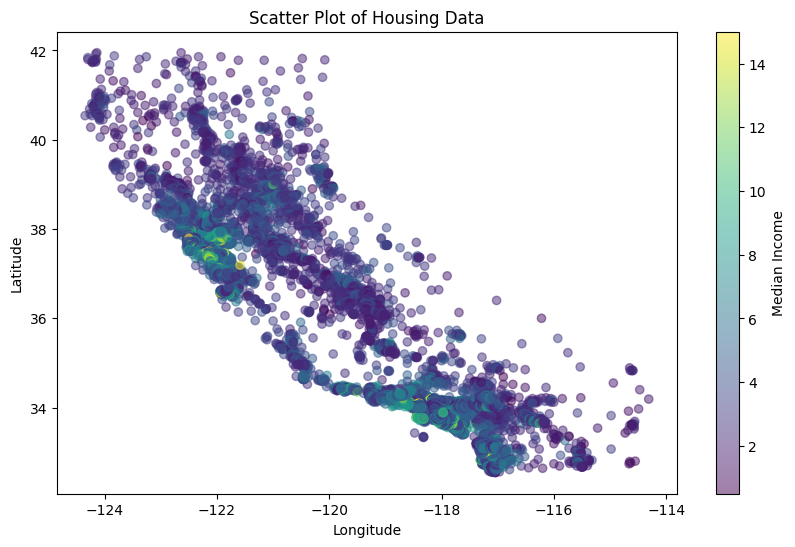

In [19]:
plt.figure(figsize=(10, 6))
plt.scatter(housing_data['Longitude'], housing_data['Latitude'], c=housing_data['MedInc'], cmap='viridis', alpha=0.5)
plt.colorbar(label='Median Income')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Scatter Plot of Housing Data')
plt.show()


In [20]:
train_data, test_data = train_test_split(housing_data, test_size=0.2, random_state=42)


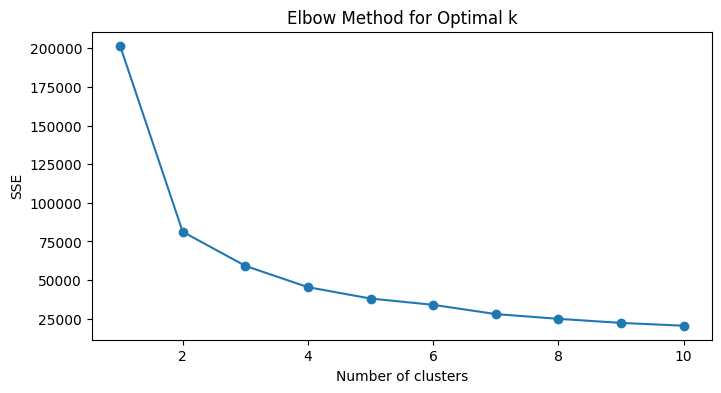

In [21]:
from sklearn.cluster import KMeans
sse = []

# Run K-means for different values of k
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42).fit(train_data)
    sse.append(kmeans.inertia_)  # Inertia is the SSE

# Plot SSE vs. number of clusters
plt.figure(figsize=(8, 4))
plt.plot(range(1, 11), sse, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('SSE')
plt.title('Elbow Method for Optimal k')
plt.show()

In [22]:

import matplotlib.pyplot as plt

kmeans = KMeans(n_clusters=6, random_state=42)
kmeans.fit(train_data)


KMeans(n_clusters=6, random_state=42)

In [23]:
train_data['cluster'] = kmeans.labels_

train_data

,Latitude,Longitude,MedInc,cluster
14196,32.71,-117.03,3.2596,3
8267,33.77,-118.16,3.8125,1
17445,34.66,-120.48,4.1563,1
14265,32.69,-117.11,1.9425,3
2271,36.78,-119.80,3.5542,5
...,...,...,...,...
11284,33.78,-117.96,6.3700,2
11964,34.02,-117.43,3.0500,3
5390,34.03,-118.38,2.9344,3
860,37.58,-121.96,5.7192,0


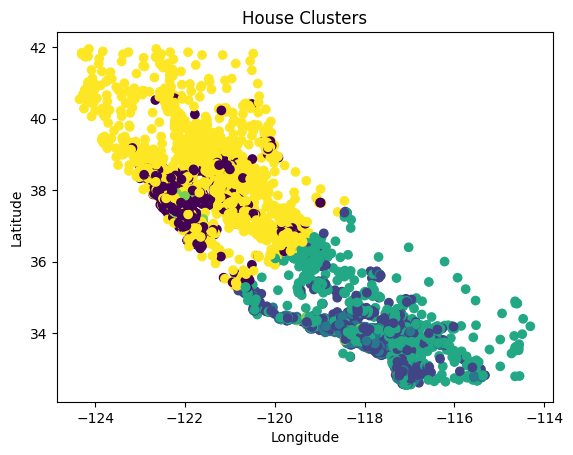

In [24]:
plt.scatter(train_data['Longitude'], train_data['Latitude'], c=train_data['cluster'], cmap='viridis')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('House Clusters')
plt.show()


In [25]:
test_data['cluster'] = kmeans.predict(test_data)


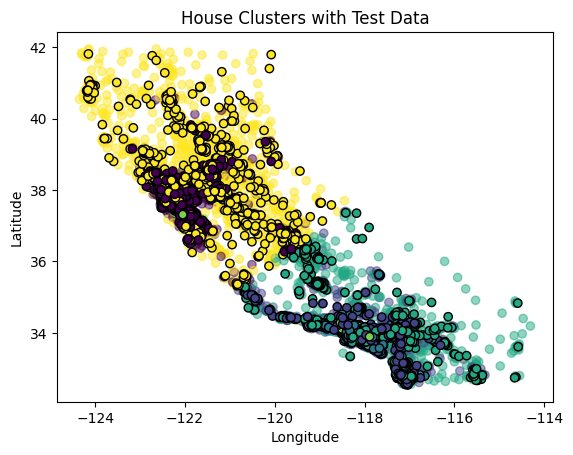

In [27]:
plt.scatter(train_data['Longitude'], train_data['Latitude'], c=train_data['cluster'], cmap='viridis', alpha=0.5)
plt.scatter(test_data['Longitude'], test_data['Latitude'], c=test_data['cluster'], cmap='viridis', edgecolor='k')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('House Clusters with Test Data')
plt.show()


In [26]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

features = train_data[['Latitude', 'Longitude', 'MedInc']]
labels = train_data['cluster']
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(features, labels)


RandomForestClassifier(random_state=42)

In [27]:
test_features = test_data[['Latitude', 'Longitude', 'MedInc']]
test_labels = test_data['cluster']
predictions = rf_model.predict(test_features)
print(classification_report(test_labels, predictions))


              precision    recall  f1-score   support

           0       0.99      0.99      0.99       561
           1       0.99      1.00      1.00       983
           2       0.99      1.00      0.99       299
           3       1.00      1.00      1.00      1111
           4       0.98      0.97      0.98        62
           5       1.00      0.99      1.00      1112

    accuracy                           1.00      4128
   macro avg       0.99      0.99      0.99      4128
weighted avg       1.00      1.00      1.00      4128



In [28]:
import joblib
joblib.dump(kmeans, 'kmeans_model.pkl')
joblib.dump(rf_model, 'rf_model.pkl')


['rf_model.pkl']